# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

## Откройте файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
#Выводим 10 строк , информацию о датасете и описание.
display(df.head(10))
df.info(10)
df.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


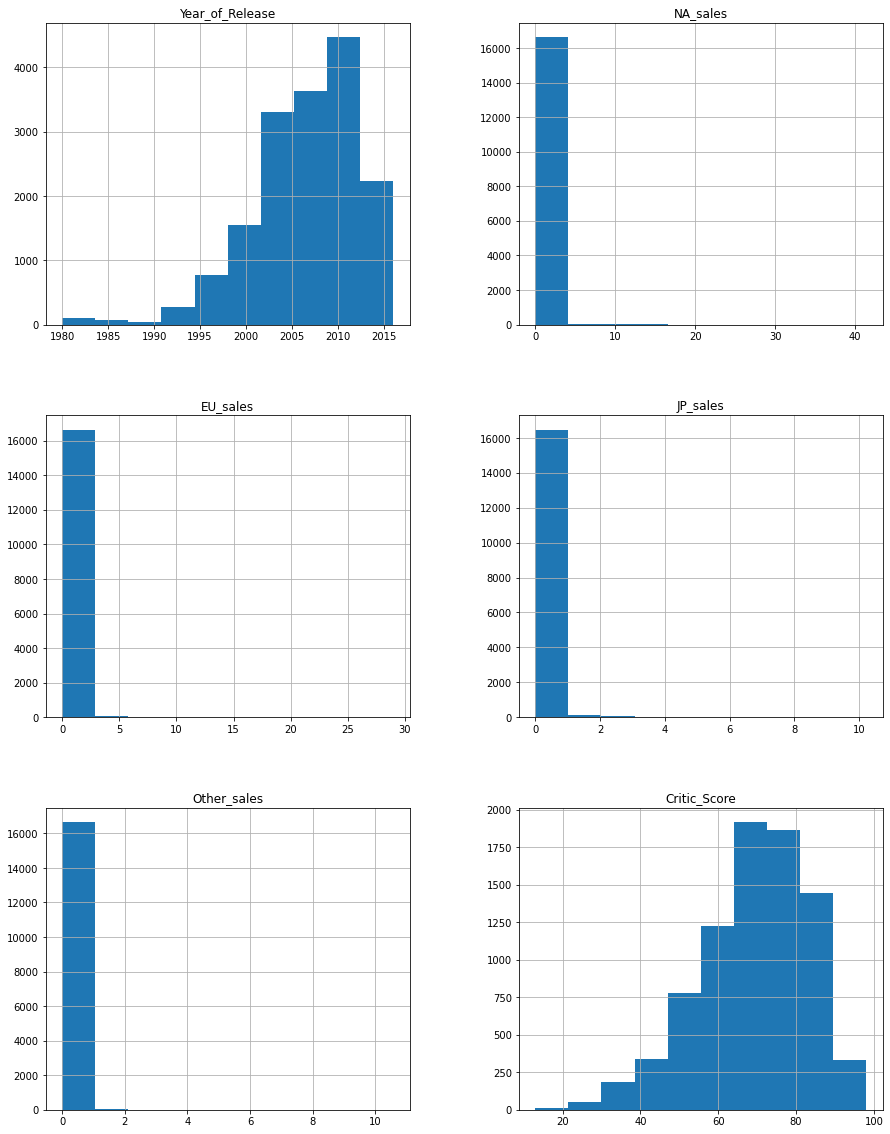

In [4]:
#Построим гистограммы 
df.hist(figsize=(15, 20))
plt.show()

## Подготовьте данные

In [5]:
#Приведем названия к нижнему регистру.
df.columns = df.columns.str.lower()
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Обработка пропусков
**Перед преобразованием типов данных,сначала надо найти и изучить пропуски в столбцах.**

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Из результатов видно, что пропуски имеются в столбцах: name, year_of_release, genre, critic_score, user_score, rating.

In [7]:
pd.DataFrame(df.isna().mean().to_frame(name='Пропуски').query('Пропуски > 0')['Пропуски'])\
            .style.background_gradient('coolwarm')\
            .format({'Пропуски':'{:.0%}'})
            #.format({'Пропуски':'{:.4%}'})

,Пропуски
name,0%
year_of_release,2%
genre,0%
critic_score,51%
user_score,40%
rating,40%


(В столбцах name и genre есть пропуски,но их всего лишь 2 штуки,так что они в таблице есть,но обозначаются 0%)

Если подправить функцию выше на : .format({'Пропуски':'{:.4%}'}) то будет видно,но таблица станет не лаконичной.

**Изучим причины пропусков**

Сначала рассмотрим critic_score,user_score,rating , там больше всего пропусков.


In [8]:
df['critic_score'].value_counts(dropna=False)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
21.0       1
22.0       1
13.0       1
17.0       1
Name: critic_score, Length: 83, dtype: int64

In [9]:
df['user_score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.5       2
0.2       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [10]:
df['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Возможные причины появления пропусков в исходных данных: 
- Существенное число пропусков говорит о том, что они могли возникнуть по причине неполного заполнения данных, ошибки на этапе выгрузки данных, либо в результате неправильного запроса/объединения таблиц. 

Просмотрев строки с пропусками и состав данных, сделали следующие предположения: пропуски в столбце user_score и значения "tbd" (to be determined) означают , что оценка не была проведена.

Пропуски в графе rating могут быть связаны не только с ошибкой в данных, но и с тем, что для данных игр по каким-либо причинам оценка рейтинга ESRB не требовалась, либо при оценке игрового контента однозначно присвоить подходящую возрастную категорию не удалось.

In [11]:
#Избавимся от пропусков, составляющих незначительную часть данных
df = df.dropna(subset=['name'])
df = df.dropna(subset=['genre']).reset_index(drop=True)
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [12]:
df.name.isna().sum()

0

In [13]:
df.year_of_release.isna().sum()

0

In [14]:
df.genre.isna().sum()

0

**Разберемся с пропусками в rating**

In [15]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим значения NaN ,значит игры не были оценены,заполнять пропуски медианным или средним значением не стоит,потому что может навредить нашим данным.

**Разберемся с пропусками в user_score**

Данные столбца user_score -  содержат NaN и строковые значения "tbd" (to be determined). Мы можем изменить тип данных на float64, при этом значения "tbd" также станут NaN, на данном этапе это нам подходит.

In [16]:
df.user_score = pd.to_numeric(df.user_score, errors='coerce')
df.user_score.head()

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

In [17]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [18]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Убрали значения tbd

**Разберемся с пропусками в critic_score**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [20]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Данные в столбце critic_score это тоже всегда целые числа, но, т.к. в них имеется большое количество пропусков,которые нельзя заменить логическими значениями и удалить также нельзя, - то на данном этапе оставим их float64

**Очевидно, что данные в столбце year_of_release должны иметь тип int64, т.к. это всегда целые числа.**

In [21]:
df.year_of_release = df.year_of_release.astype('int')
df.year_of_release.head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Итак**,year_of_release сделали int64 ,а user_score float64 плюс изменили значения tbd на NaN

### Дубликаты

Приведем все текстовые значения к нижнему регистру.

In [23]:
df.name = df.name.str.lower()
df.platform = df.platform.str.lower()
df.genre = df.genre.str.lower()
df.rating = df.rating.str.lower()

**Проверим данные на наличие явных дубликатов:**

In [24]:
df.duplicated().sum()

0

Явных дубликатов пока что не обнаружено

**Изучим уникальные значения в столбце platform**

In [25]:
df.platform.sort_values().unique()

array(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg',
       'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp',
       'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360',
       'xb', 'xone'], dtype=object)

Дубликатов нет

**Изучим уникальные значения в столбце year_of_release**

In [26]:
df.year_of_release.sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Дубликатов нет

**Изучим уникальные значения в столбце genre**

In [27]:
df.genre.sort_values().unique()

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

Дубликатов нет

**Изучим уникальные значения в столбце rating**

In [28]:
df.rating.sort_values().unique()

array(['ao', 'e', 'e10+', 'ec', 'k-a', 'm', 'rp', 't', nan], dtype=object)

Дубликатов нет

**Изучим уникальные значения в столбце name**

In [29]:
df.name.sort_values().unique()[:50]

array([' beyblade burst', ' fire emblem fates', " frozen: olaf's quest",
       ' haikyu!! cross team match!', ' tales of xillia 2', "'98 koshien",
       '.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)',
       '.hack//g.u. vol.3//redemption', '.hack//infection part 1',
       '.hack//link', '.hack//mutation part 2', '.hack//outbreak part 3',
       '.hack//quarantine part 4: the final chapter',
       '.hack: sekai no mukou ni + versus', '007 racing',
       '007: quantum of solace', '007: the world is not enough',
       '007: tomorrow never dies', '1 vs. 100', '1/2 summer +',
       '10 minute solution', '100 all-time favorites',
       '100 classic books', '100 classic games',
       '1000 cooking recipes from elle à table', '1001 touch games',
       '101-in-1 explosive megamix', '101-in-1 party megamix wii',
       '101-in-1 sports megamix', '101-in-1 sports party megamix',
       '1080°: teneighty snowboarding', '11e

In [30]:
len(df.name.sort_values().unique())

11426

В данном списке нет дубликатов,но трудно оценить список полностью,поэтому пока что оставим без изменений

### Проверим, есть ли явные аномальные значения (отрицательные) в значениях продаж и оценках критиков и пользоваталей:¶

In [31]:
len(df[df.eu_sales < 0])

0

In [32]:
len(df[df.na_sales < 0])

0

In [33]:
len(df[df.jp_sales < 0])

0

In [34]:
len(df[df.other_sales < 0])

0

In [35]:
len(df[df.critic_score < 0])

0

In [36]:
len(df[df.user_score < 0])

0

Явных аномалий нет

### Создадим столбец с сумой продаж по регионам

In [93]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

In [94]:
#df['total_sales'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [38]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Проведём исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы.

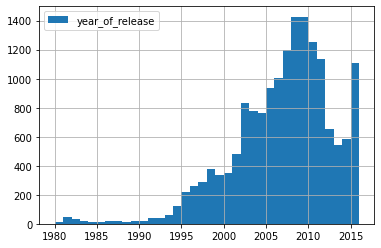

In [40]:
df['year_of_release'].hist(bins=36, legend='year_of_release')
plt.show()

In [41]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

До 1994г выходило не больше 100 игр. Думаю данные до 1995г не сильно важны.

Больше всего игр было выпущено в 2008-2009 года.

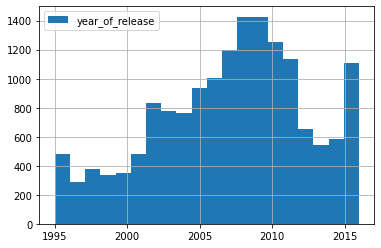

In [42]:
df['year_of_release'].hist(bins=20,range=(1995,2016), legend='year_of_release')
plt.show()

In [43]:
df_new = df.query('year_of_release >= 1995').reset_index(drop=True)

### Посмотрим, как менялись продажи по платформам.

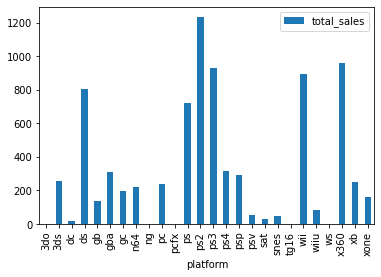

In [44]:
df_new.pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(y='total_sales', kind='bar');

In [45]:
plat_sales = df_new.pivot_table(index='platform',\
                      values='total_sales',\
                      aggfunc='sum') \
.sort_values(by='total_sales',ascending=False)

In [46]:
plat_sales

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.76
ps,721.55
ps4,314.14
gba,312.88
psp,289.53


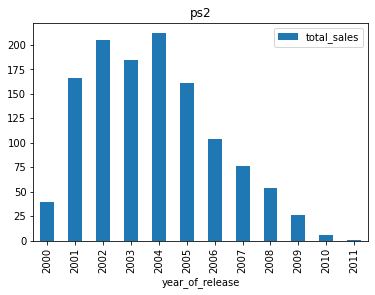

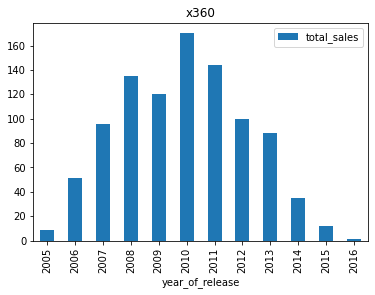

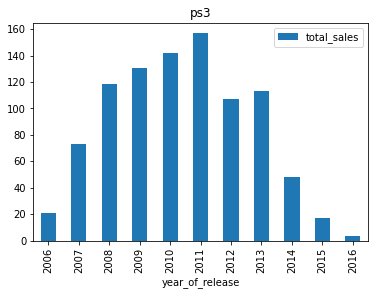

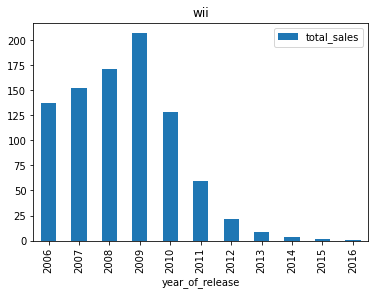

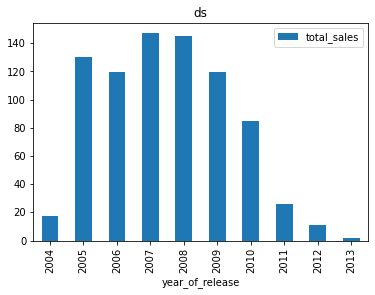

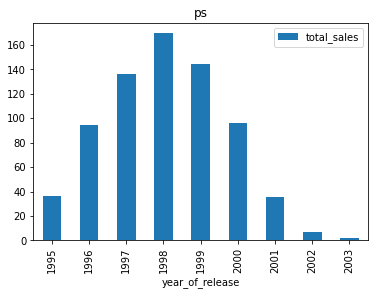

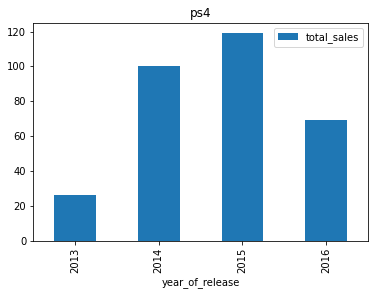

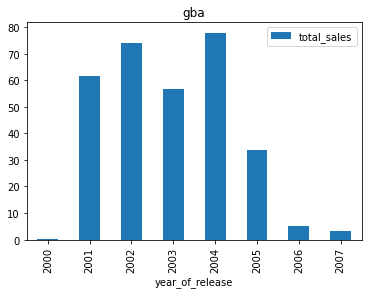

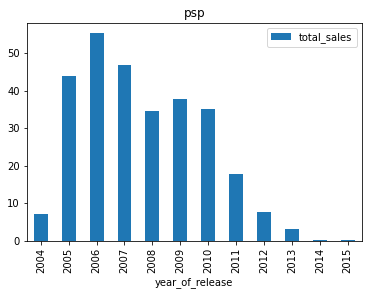

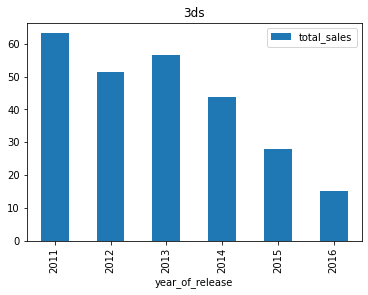

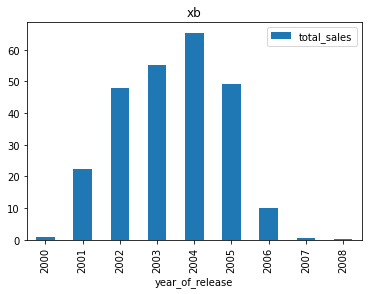

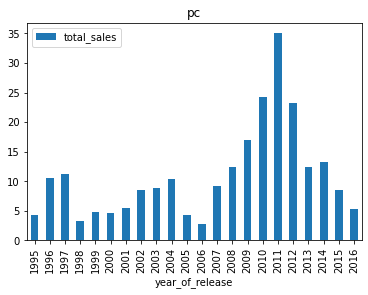

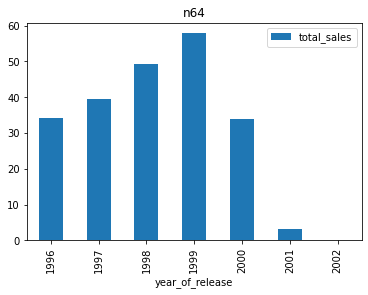

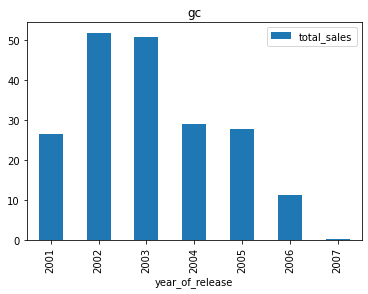

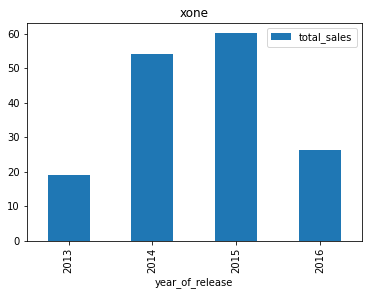

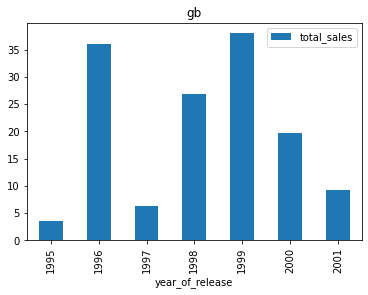

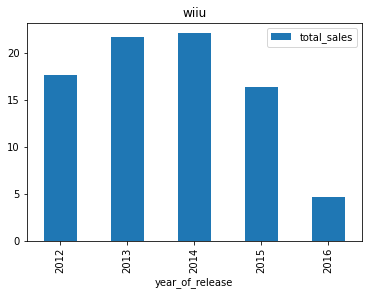

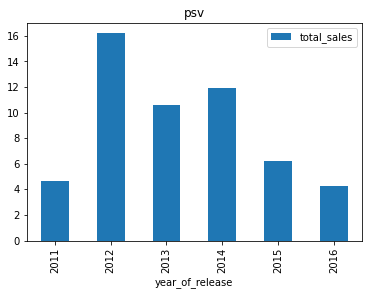

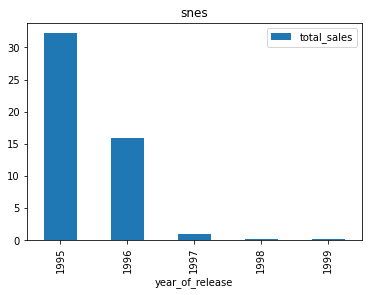

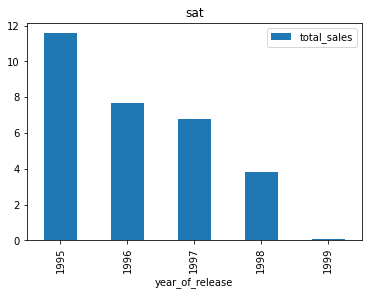

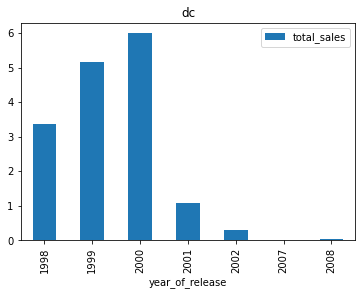

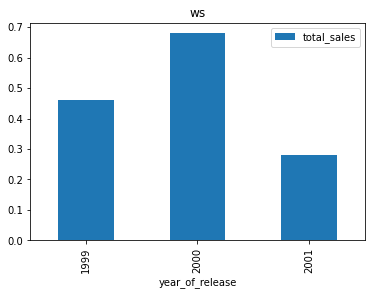

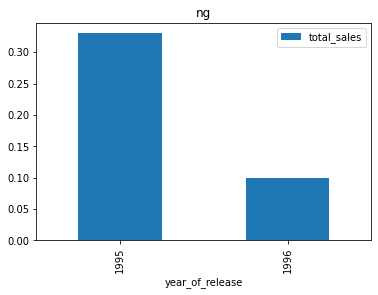

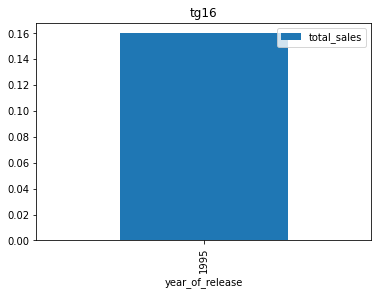

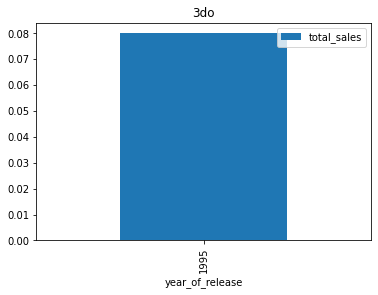

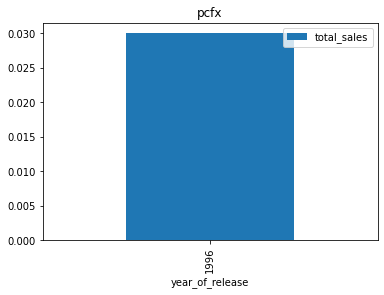

In [47]:
for p in plat_sales.index:
    (df_new.query('platform == @p')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', title=p)
    )
    plt.show()

По графикам видно , что изначально игровых платформ было мало и обновлялись они редко. 

Где то с 2000г поколения приставок меняется с периодичностью раз в 4 -5 лет. Хорошо заметны кокуренты например X360 и PS3.

Также из графиков получили наблюдение, что к 2013-2014 году самые популярные платформы практически исчезли из продаж 

**Для определения актуального периода** для прогноза на 2017 г посмотрим динамику продаж по годам по всем платформам и оценим, когда начали появляться новые перспективные платформы:

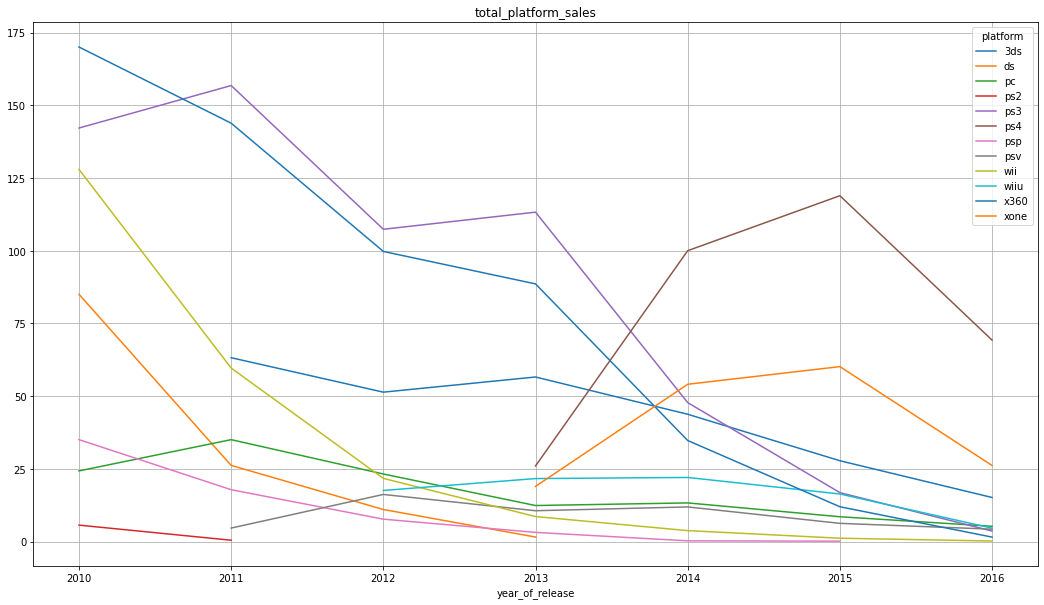

In [48]:
(df_new
    .query('year_of_release >= 2010')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(title='total_platform_sales', grid=True, figsize=(18, 10)));

Из полученного графика видим, что в 2013 г. начали появляться новые платформы(ps4 и xone). 

С учетом того, что компьютерные игры - это активно меняющаяся индустрия,в качестве актуального периода для формирования прогноза на 2017 г. возьмем для анализа данные начиная с 2012 года.

### Проанализируем данные по продажам игр разных платформ за актуальный период:

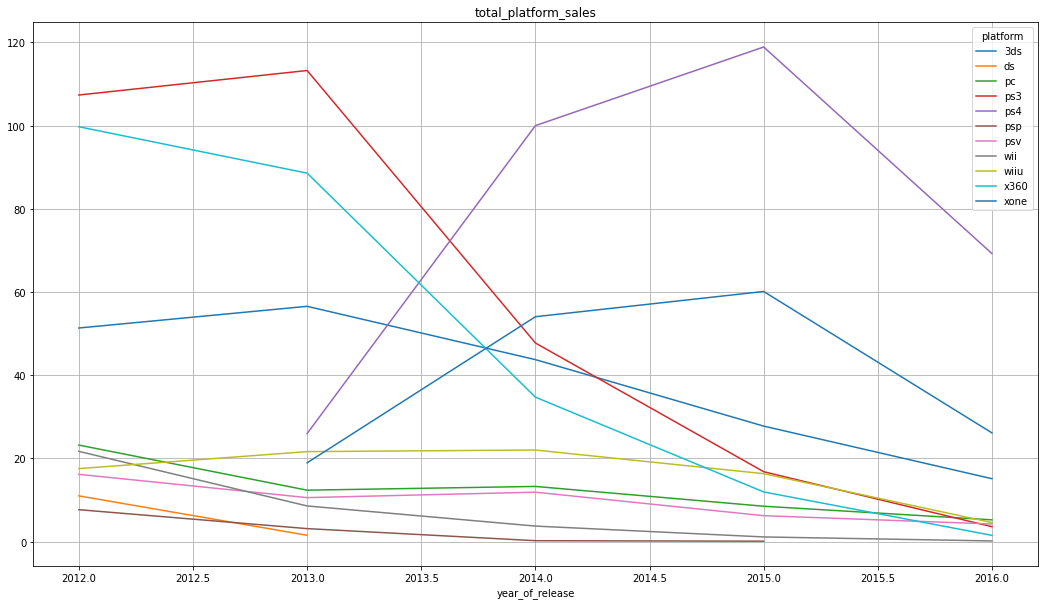

In [49]:
(df_new
    .query('year_of_release >= 2012')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(title='total_platform_sales', grid=True, figsize=(18, 10)));

Из полученного графика видим, что к концу 2016 г. наблюдается общая динамика спада продаж по всем платформам, при этом ps4 , xone и 3ds лидируют по продажам и являются потенциально прибыльными на 2017 г.

In [50]:
per_plat = (df_new
                 .query('year_of_release == 2016')
                 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                 .sort_values(by='total_sales', ascending=False).head(3))
per_plat

,total_sales
platform,
ps4,69.25
xone,26.15
3ds,15.14


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам 

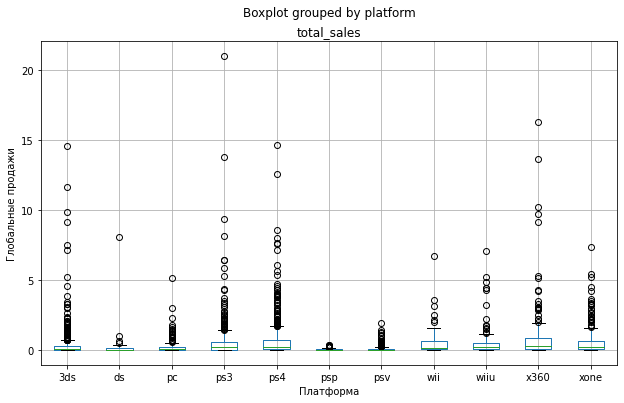

In [51]:
df_new.query('year_of_release >= 2012').boxplot(column='total_sales', by='platform', figsize=(10,6))
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи');

**Для наглядности изменим масштаб графика, ограничив пределы по вертикали**

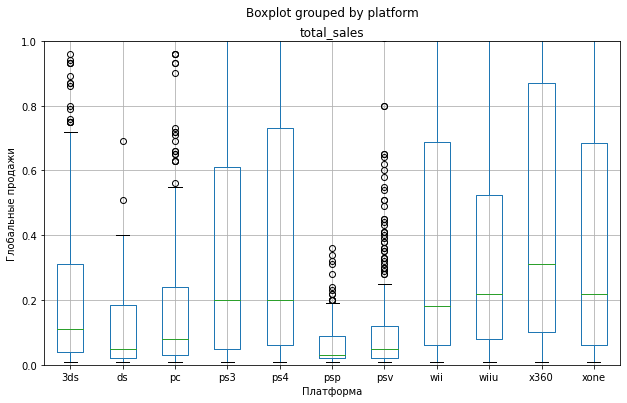

In [52]:
df_new.query('year_of_release >= 2012').boxplot(column='total_sales', by='platform', figsize=(10,6))
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim([0,1]);

Посмотрим на данные с describe

In [53]:
df_new.query('year_of_release >= 2014').pivot_table(index='platform', values = 'total_sales', aggfunc = ['describe'])

describe                                                       
              25%    50%     75%  count    max      mean   min       std
platform                                                                
3ds        0.0300  0.090  0.2500  212.0  11.68  0.408868  0.01  1.188368
pc         0.0200  0.060  0.2000  151.0   3.05  0.179139  0.01  0.329359
ps3        0.0400  0.110  0.3250  219.0   5.27  0.311324  0.01  0.633059
ps4        0.0575  0.185  0.6900  376.0  14.63  0.766356  0.01  1.614969
psp        0.0100  0.020  0.0200   13.0   0.09  0.027692  0.01  0.027735
psv        0.0200  0.040  0.0900  295.0   1.96  0.075932  0.01  0.141591
wii        0.0350  0.180  0.7550   11.0   2.01  0.460909  0.01  0.625451
wiiu       0.0500  0.190  0.5700   73.0   7.09  0.588767  0.01  1.161467
x360       0.0700  0.180  0.5050  111.0   4.28  0.434414  0.01  0.628967
xone       0.0500  0.205  0.6325  228.0   7.39  0.615614  0.01  1.046513

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Для анализа влияния оценок пользоваталей и критиков на продажи можем исследовать данные по платформам PS4  или XOne они лидирующие по продажам к концу 2016 года и являются потенциально прибыльны для 2017 года.

Я возьму PS4

In [54]:
df_critic = (df_new
             .query('year_of_release >= 2012 and platform == "ps4"')
             .dropna(subset=['critic_score']))

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

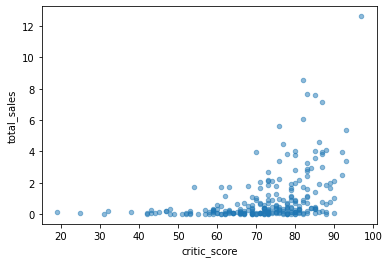

In [55]:
df_new.query('platform == "ps4"').plot(x='critic_score',y='total_sales',kind='scatter',alpha=0.5)

Видим,что с ростом оценок от критиков растут и глобальные продажи,а также увеличивается разброс.

In [56]:
#подсчитаем корреляцию
df_new.query('platform == "ps4"')['total_sales'].corr(df_new['critic_score'])

0.406567902061781

Корреляция - 0.4 , показывает нам что есть средняя положительная зависимость у оценок критиков и продаж игр.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

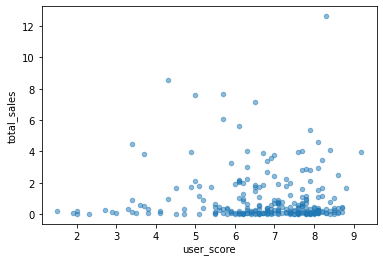

In [57]:
df_new.query('platform == "ps4"').plot(x='user_score',y='total_sales',kind='scatter',alpha=0.5)

Видим,что с увеличением оценок пользователей,продажи не сильно повышаются,однако повышается разброс.

In [58]:
df_new.query('platform == "ps4"')['total_sales'].corr(df_new['user_score'])

-0.031957110204556376

А тут корреляция показывает отсутствие зависимости между оценками пользователей и продажами.


**Посмотрим корреляции на других платформах**



In [59]:
per_plat.index

Index(['ps4', 'xone', '3ds'], dtype='object', name='platform')

**XOne**

In [60]:
df_new.query('platform == "xone"')['total_sales'].corr(df_new['critic_score'])

0.41699832800840175

Средняя зависимость между продажами и оценками критиков.

In [61]:
df_new.query('platform == "xone"')['total_sales'].corr(df_new['user_score'])

-0.06892505328279412

Отсутсвует зависимость между продажами и оценками пользователей.

**3DS**

In [62]:
df_new.query('platform == "3ds"')['total_sales'].corr(df_new['critic_score'])

0.34873973059848346

Также есть наличие средней зависимости между продажами и оценками критиков.

In [63]:
df_new.query('platform == "3ds"')['total_sales'].corr(df_new['user_score'])

0.22207843643390884

А вот тут в отличие от PS4 И XOne есть зависимость,слабая ,но есть.

### Распределение игр по жанрам

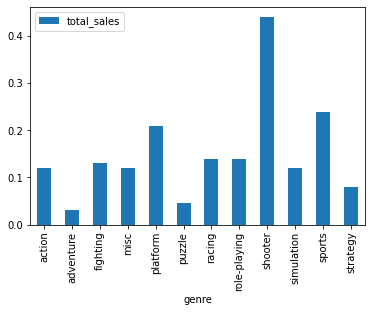

In [64]:
(df_new
 .query('year_of_release >= 2012')
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .plot(y='total_sales', kind='bar'));

Думаю,тут мудрить не надо, самые популярные жанры (топ 5):
- Shooter
- Sports
- Platform
- racing \ role-playing
- fighting

Рассмотрим какой жанр и где он популярен рассмотрим далее,плюс я предположу прямо сейчас,что в японии результаты будут отличаться,связано это с жесткой цензурой , всякие шутеры,файтинги и т.д. подверглись ограничениям (переделанные персонажи,кровь и спец эффекты - все это из-за пониженной насильности(less violence))
Так-же там ограничение на продолжительность игр ( по часам если не ошибаюсь), чтож сейчас увидим.

## Составим портрет пользователя каждого региона

Дальше я беру данные с 2014 года, потому что ps4,xone как раз появились в 2013 и за год успели набрать обороты.

### Определите платформу  для пользователя каждого региона (NA, EU, JP)

In [65]:
(df_new
    .query('year_of_release >= 2014')
    .pivot_table(index='platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['median', 'sum'])
)

median                        sum                  
         eu_sales jp_sales na_sales eu_sales jp_sales na_sales
platform                                                      
3ds          0.00    0.055     0.00    16.12    44.24    22.64
pc           0.05    0.000     0.00    17.97     0.00     7.23
ps3          0.01    0.020     0.02    25.54    11.22    22.05
ps4          0.07    0.015     0.05   130.04    15.02    98.61
psp          0.00    0.020     0.00     0.00     0.36     0.00
psv          0.00    0.030     0.00     3.53    14.54     2.52
wii          0.12    0.000     0.04     2.59     0.00     2.08
wiiu         0.06    0.010     0.09    13.15     7.31    19.36
x360         0.05    0.000     0.10    15.49     0.08    28.30
xone         0.07    0.000     0.10    46.25     0.32    81.27

**Определим топ-5 самых продаваемых платформ в Северной Америке**

In [66]:
best_plat_na = (df_new
              .query('year_of_release >= 2014')
              .pivot_table(index='platform', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).head(5))
best_plat_na

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


**Определим топ-5 самых продаваемых платформ в Европе**

In [67]:
best_plat_eu = (df_new
              .query('year_of_release >= 2014')
              .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).head(5))
best_plat_eu

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


**Определим топ-5 самых продаваемых платформ в Японии**

In [68]:
best_plat_jp = (df_new
              .query('year_of_release >= 2014')
              .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).head(5))
best_plat_jp

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


Дальше сделаю круговые диаграммы для качественного сравнения.

Text(0, 0.5, '')

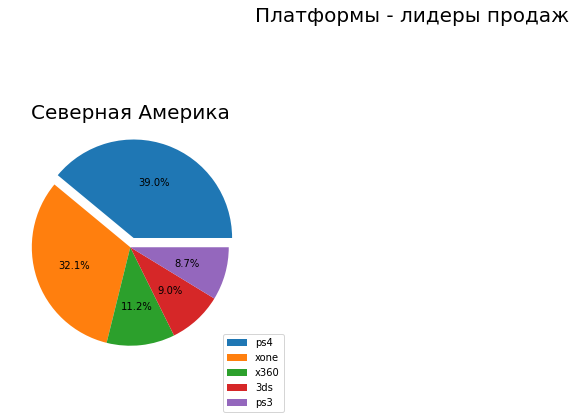

In [69]:
#Сев.Америка
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Платформы - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
best_plat_na.na_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Северная Америка', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')

Text(0, 0.5, '')

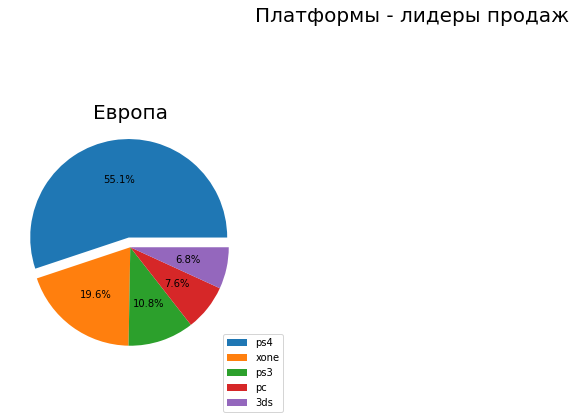

In [70]:
#Европа
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Платформы - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
best_plat_eu.eu_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Европа', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')

Text(0, 0.5, '')

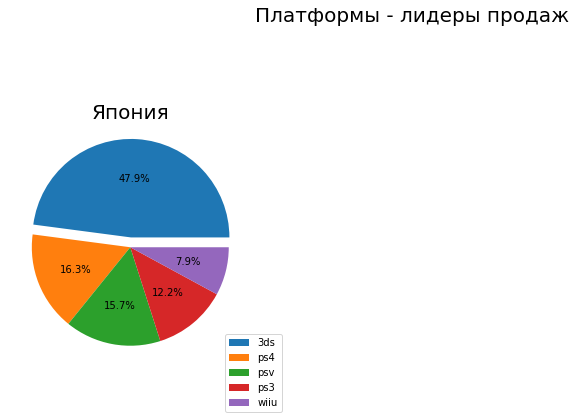

In [71]:
#Япония
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Платформы - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
best_plat_jp.jp_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Япония', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')

Из графиков видно , что :
- В Северной Америке и Европе самые популярные платформы PS4 и XOne.
- Японии - 3DS и PS4, при этом игры платформы 3DS составляют почти половину от всех продаж ТОП-5 платформ в Японии, а игры платформы Xone (одного из лидеров рынка Северной Америки и Европы) - в Японии практически не продаются.

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5):

Также определим медианные значения,но по жанрам.

In [72]:
(df_new
    .query('year_of_release >= 2014')
    .pivot_table(index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['median', 'sum'])
)

median                        sum                  
             eu_sales jp_sales na_sales eu_sales jp_sales na_sales
genre                                                             
action          0.020     0.01    0.010    74.68    29.58    72.53
adventure       0.000     0.01    0.000     6.49     3.60     5.64
fighting        0.020     0.03    0.040     6.69     6.37    12.43
misc            0.010     0.01    0.010    12.86     5.61    15.05
platform        0.055     0.00    0.075     6.80     2.69     6.79
puzzle          0.000     0.03    0.000     0.52     0.93     0.65
racing          0.050     0.00    0.030    14.13     1.76     8.74
role-playing    0.010     0.05    0.020    28.17    31.16    33.47
shooter         0.220     0.00    0.220    65.52     4.87    79.02
simulation      0.030     0.00    0.000     7.30     2.31     2.63
sports          0.050     0.00    0.070    45.73     3.26    46.13
strategy        0.010     0.00    0.000     1.79     0.95     0.98

И пройдемся по Америке , Европе и Японии по отдельности.

**Определим топ-5 самых продаваемых платформ в Северной Америке**

In [73]:
best_genre_na = (df_new
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).head(5))
best_genre_na

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


**Определим топ-5 самых продаваемых платформ в Европе**

In [74]:
best_genre_eu = (df_new
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).head(5))
best_genre_eu

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


**Определим топ-5 самых продаваемых платформ в Японии**

In [75]:
best_genre_jp = (df_new
              .query('year_of_release >= 2014')
              .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).head(5))
best_genre_jp

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


Также сделаем круговые графики.

Text(0, 0.5, '')

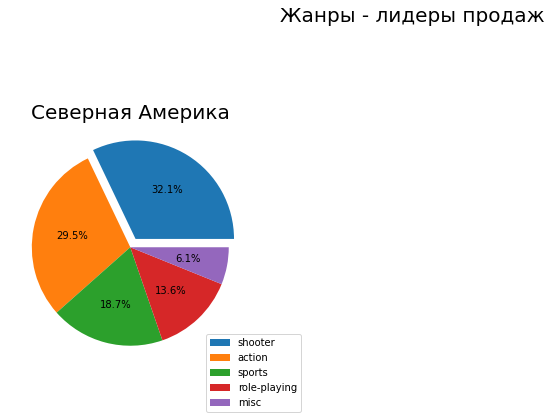

In [76]:
#Сев.Америка
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Жанры - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
best_genre_na.na_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Северная Америка', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')

Text(0, 0.5, '')

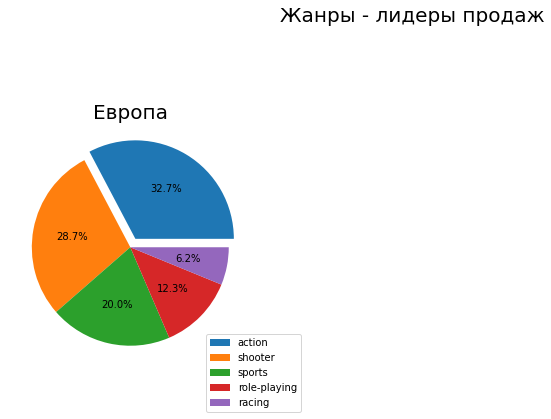

In [77]:
#Европа
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Жанры - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
best_genre_eu.eu_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Европа', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')

Text(0, 0.5, '')

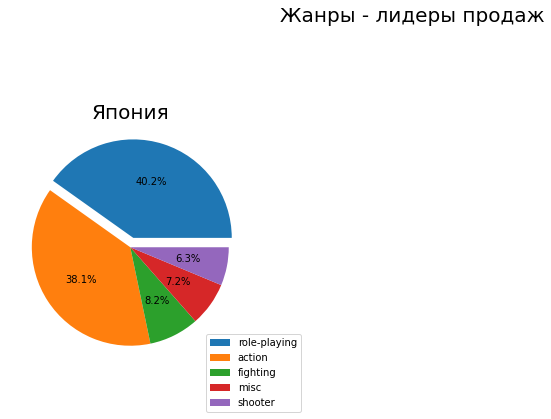

In [78]:
#Япония
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Жанры - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
best_genre_jp.jp_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', explode=(0.1,0,0,0,0), labeldistance=None)
plt.title('Япония', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')

Из графиков видно , что :

-В Северной Америке и Европе самые популярные жанры action и shooter.
-Японии - RP(Role_playing) и action, при этом игры платформы RP составляет почти половину от всех продаж ТОП-5 жанров в Японии, а игры жанра shooter (одного из лидеров рынка Северной Америки и Европы) - в Японии меньше всего.

Как я и говорил ранее , в Японии( а также в Китае и Корее есть жесткая цензура на игры с насилием(figting,shooter) и именно поэтому они не пользуются большим спросом в Японии,ведь эти жанры буквально польность зацензурили и их вообще сложно купить.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Вообще ESBR это организация по определению рейтинга для игр по возрасту, далее рассмотрим по каждой стране.

In [79]:
df_new['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [80]:
df_new['rating']=df_new['rating'].fillna("unrate")
#Значения nan заменил на unrate,наверное это надо было сделать раньше,но до меня дошло только сейчас.

In [81]:
esbr_pivot = (df_new
    .query('year_of_release >= 2014')
    .pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
esbr_pivot

,eu_sales,jp_sales,na_sales
rating,,,
e,58.06,8.94,50.74
e10+,26.16,4.46,33.23
m,93.44,8.01,96.42
t,34.07,14.78,38.95
unrate,58.95,56.90,64.72


Видим 4 оценки рейтинга, а еще есть unrate - игры без возрастного рейтинга.

Text(0, 0.5, '')

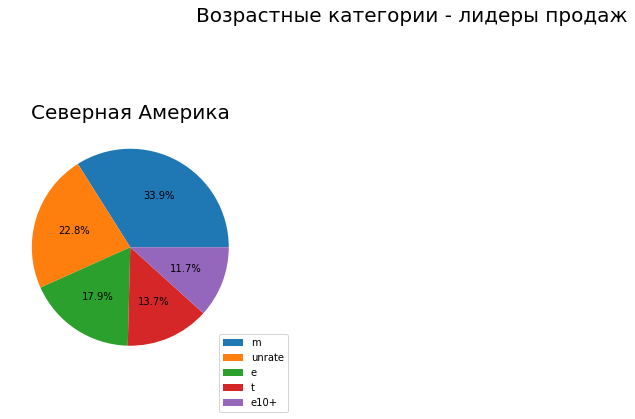

In [82]:
#Северная Америка
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Возрастные категории - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
esbr_pivot.na_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', labeldistance=None)
plt.title('Северная Америка', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')

Text(0, 0.5, '')

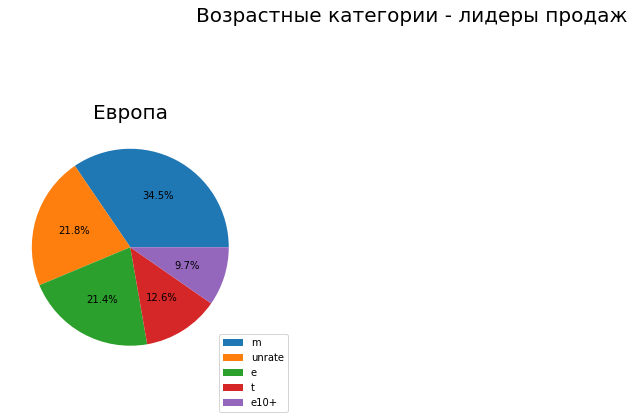

In [83]:
#Европа
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Возрастные категории - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
esbr_pivot.eu_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', labeldistance=None)
plt.title('Европа', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')

Text(0, 0.5, '')

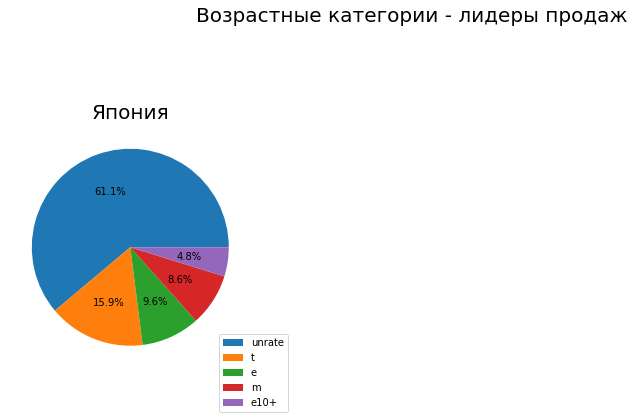

In [84]:
#Япония
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Возрастные категории - лидеры продаж', fontsize=20)
plt.subplot(1, 3, 1)
esbr_pivot.jp_sales.sort_values(ascending = False).head(5).plot(kind='pie', autopct='%1.1f%%', labeldistance=None)
plt.title('Япония', fontsize=20)
plt.legend(loc='center', bbox_to_anchor=(1.0,-0.01))
plt.ylabel('')

Из графиков видно:
- В Северной Америке и Европе преобладает рейтинг m(Для взрослых с 17 лет) и unrate (без рейтинга,скорее всего либо еще не  дали рейтинг ,либо для всех)

- В Японии больше половины продаж занимает unrate (как я понимаю,это игры ,которые обходят традиционную оценку рейтинга в Японии специально,однако это только мое субьективное мнение.)

- В трех странах на 3 месте рейтинг t(для подростков,а именно с 13 лет)

**Микро-вывод по 4 пункту**

В Европе и Северной Америке преобладают такие платформы как : 
- PS4 И Xbox One . 
А жанры у них в основном это :
- Action и Shooter
В Японии же преобладает платформы:
- 3DS , PS4 на втором месте
А жанры , в основном это:
- RP(role_playing) и Action

~~-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------~~

В ходе исследования ESBR мы увидели,что в Европе и Северной америке преобладает **m** рейтинг и игры без рейтинга **unrate**

В Японии же игры без рейтинга являются абсолютными лидерами, а рейтинг **t** на втором месте(свои догадки по рейтингу в японии я описал выше)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выберем для анализа данные без пропусков в оценках пользователей

In [85]:
#df_hyp = (df_new
          #.query('year_of_release >= 2014')
          #.dropna(subset=['user_score']))
#df_hyp

Сформируем нулевую и альтернативную гипотезы.

Итак нулевая гипотеза Н0 - Средние user_score платформ Xbox One и PC одинаковые


Альтернативная гипотеза Н1 - Средние user_score платформ Xbox One и PC различаются

Проверяем  **:**)

In [86]:
df_new['user_score'] = pd.to_numeric(df_new['user_score'])

In [87]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15958 entries, 0 to 15957
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15958 non-null  object 
 1   platform         15958 non-null  object 
 2   year_of_release  15958 non-null  int64  
 3   genre            15958 non-null  object 
 4   na_sales         15958 non-null  float64
 5   eu_sales         15958 non-null  float64
 6   jp_sales         15958 non-null  float64
 7   other_sales      15958 non-null  float64
 8   critic_score     7979 non-null   float64
 9   user_score       7459 non-null   float64
 10  rating           15958 non-null  object 
 11  total_sales      15958 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [88]:
df_hyp = (df_new.query('year_of_release >= 2014').dropna(subset=['user_score']))

In [89]:
results = st.ttest_ind(df_hyp[df_hyp.platform =='xone']['user_score'],\
                       df_hyp[df_hyp.platform =='pc']['user_score'],\
                      equal_var=False)
alpha = 0.05
#Не стал мудрить с разбросом взял 0.05 
print('p-value:',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

p-value: 0.11601398086668832
Принимаем нулевую гипотезу


P-value = 0.12. 

Это значит, что вероятность получить такое среднее значение при условии, что гипотеза верна, больше порогового значения, значит принимаем нулевую гипотезу.

In [90]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15958 entries, 0 to 15957
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15958 non-null  object 
 1   platform         15958 non-null  object 
 2   year_of_release  15958 non-null  int64  
 3   genre            15958 non-null  object 
 4   na_sales         15958 non-null  float64
 5   eu_sales         15958 non-null  float64
 6   jp_sales         15958 non-null  float64
 7   other_sales      15958 non-null  float64
 8   critic_score     7979 non-null   float64
 9   user_score       7459 non-null   float64
 10  rating           15958 non-null  object 
 11  total_sales      15958 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Проверка гипотезы: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформируем нулевую и альтернативную гипотезы.

**Нулевая гипотеза Н0** - средние оценки пользователей игр user_score жанров action равны средним оценкам пользователей игр жанров sports.

**Алтернативная гипотеза Н1** - средние оценки пользователей игр user_score жанров action различаются со средним оценкам пользователей игр жанров sports.

In [91]:
results = st.ttest_ind(df_hyp[df_hyp.genre =='action']['user_score'],\
                       df_hyp[df_hyp.genre =='sports']['user_score'],\
                      equal_var=False)
alpha = 0.05
print('p-value:',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


P-value = 1.1825550382644557e-14 .

Это значит, что вероятность получить такое среднее значение при условии, что гипотеза верна, больше порогового значения, значит отвергаем нулевую гипотезу.

## Общий вывод

С целью найти определяющие успешность игры закономерности мы проанализировали  продажи игр, оценки пользователей и экспертов, жанры и платформы до 2016 г.

Перед проведением анализа и проверкой гипотез понадобился обзор и предобработка данных. До предобработки объем данных составлял 16715 строк, который в процессе обработки сократился до 15958 строк.

Привели стобцы к нижнему регистру.

Избавились от пропусков в столбцах **name,genre и year_of_release**, составляющих незначительную часть данных. Пропуски в столбце **rating** заменили на значение 'unrate'. 

Преобразовали типы данных в столбцах: 
- Данные в столбце year_of_release привели к типу int64, т.к. это всегда целые числа
- Данные в столбце critic_score это тоже всегда целые числа, но, т.к. в них имелось большое количество пропусков,которые нельзя заменить логическими значениями и удалить также нельзя, - то на данном этапе оставили их float64. 
- Изменили тип данных столбца user_score на float64.


Для последующего анализа посчитали и добавили в таблицу данные о суммарных продажах во всех регионах.


Далее провели исследовательский анализ данных:

- Изучили, сколько игр выпускалось в разные годы: больше всего игр выпускалось в 2008 и 2009 гг. 


- Доля игр, выпущенных до 1995 г. довольно мала, и для анализа они не важны.


- Для определения актуального периода для прогноза на 2017 г посмотрели динамику продаж по годам по всем платформам о обнаружили, что в 2013 г. начали появляться новые перспективные платформы.


- Проанализировав данные по продажам игр разных платформ за актуальный период (начиная с 2014 года), выяснили, что к концу 2016 г. наблюдается общая динамика спада продаж по всем платформам, при этом три платформы явно лидируют по продажам и являются потенциально прибыльными на 2017 г: ps4, xone, 3ds.



- Из графика «ящик с усами» по глобальным продажам игр в разбивке по платформам и численных значений обнаружили, что размахи продаж сильно отличаются на разных платформах,ольшое количество выбросов на определенных платформах говорит о том, что у некоторых игр этих платформ были большие продажи.


- Посмотрев, как влияют на продажи отзывы пользователей и критиков по платформе PS4, лидирующей по продажам к концу 2016 г. и являющейся потенциально прибыльной на 2017.


- Выяснили, что что с ростом оценки критиков растет также и объем продаж, при этом также увеличивается разброс в продажах.


- Проанализировав зависимость объема продаж от оценок пользоваталей по этой же платформе, увидели, что с ростом оценки пользователей увеличивается разброс в продажах, но в среднем объем продаж остается на том же уровне.





Далее составили портрет пользователя каждого региона:

Проведя исследование ТОП-5 самых популярных платформ и жанров для каждого региона , а также оценив влияние рейтинга ESRB на продажи в отдельном регионе, можем составить портрет пользователя каждого региона: 
- Типичный пользователь игр в Северной Америке приобретает игры платформ PS4 и XOne жанров Action, Shooter или Sports из возрастных категорий M (Для взрослых, 17+) и E («Для всех», 6+) или без рейтинга ESRB. 


- Типичный пользователь игр в Европе приобретает игры платформ PS4 и XOne жанров Action, Shooter или Sports из возрастных категорий M («Для взрослых», 17+) и E («Для всех», 6+) или без рейтинга ESRB. 


- Типичный пользователь игр в Японии приобретает игры платформ 3DS и PS4 жанра Role-Playing и Action, не имеющей рейтинга возрастных категорий ESRB. 


В Японии игры платформы Xone (одного из лидеров рынка Северной Америки и Европы) практически не продаются, игры жанра Sports (одного из лидеров рынков Северной Америки и Европы) - продаются очень мало. Абсолютно большая часть продаваемых игр в Японии не имеет рейтинга ESRB.

Рынок Японии существенно отличается от рынка Северной Америки и Европы по всем вышеперечисленным пунктам.

Далее выполнили проверку гипотез:

1)
Сформировав нулевую гипотезу (Н0) как: средние оценки пользователей игр user_score платформы xone равны средним оценкам пользователей игр платформы pc. 

И альтернативную гипотезу (Н1) как: средние оценки пользователей игр user_score платформы xone не равны средним оценкам пользователей игр платформы pc. 

Получили значение P-value = 0.12. 

Это значит, что вероятность получить такое среднее значение при условии, что гипотеза верна, больше порогового значения, т.е. данные не противоречат гипотезе, нулевую гипотезу опровергнуть не получилось.


**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**



2)
Сформировав нулевую гипотезу (Н0) как: средние оценки пользователей игр user_score жанров action различаются средним оценкам пользователей игр жанров sports. 

И альтернативную гипотезу (Н1), как: средние оценки пользователей игр user_score жанров action равны средним оценкам пользователей игр жанров sports.

Получили значение P-value = 1.1825550382644557e-14.

Это значит, что вероятность получить такое среднее значение при условии, что гипотеза верна, больше порогового значения, значит отвергаем нулевую гипотезу.